# Modelo CNN de reconocimiento emocional

Este notebook carga un modelo `.h5` previamente entrenado y realiza inferencia sobre imágenes sueltas para detectar emociones faciales.


In [3]:
!pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
  Using cached importlib_resources-6.5.2-py3-none-any.whl.metadata (3.9 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 39.0 MB/s eta 0:00:0000:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 45.4 MB/s eta 0:00:00
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8/8 [matplotlib]8 [matplotlib]esources]


## Librerias


In [4]:

import tensorflow as tf
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt


## Carga del modelo

In [ ]:
model_path = '../models/modelo_emocion.h5'
model = tf.keras.models.load_model(model_path, compile=False) #modificar modelo preentrenado por uno mas actual para no usar el compile=False
print("Modelo cargado correctamente")

Modelo cargado correctamente


## Carga y preprocesamiento

In [21]:
def preprocess_image(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (64, 64))  # FER2013 size
    img = img / 255.0
    img = np.expand_dims(img, axis=-1)
    img = np.expand_dims(img, axis=0)
    return img


## Prediccion

In [35]:
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

def predict_emotion(img_path):
    img = preprocess_image(img_path)
    preds = model.predict(img)
    class_idx = np.argmax(preds)
    emotion = emotion_labels[class_idx]
    return emotion, preds[0]


## Prueba

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Emoción detectada: Sad
Probabilidades: ['Angry: 0.05', 'Disgust: 0.00', 'Fear: 0.17', 'Happy: 0.20', 'Sad: 0.22', 'Surprise: 0.15', 'Neutral: 0.21']


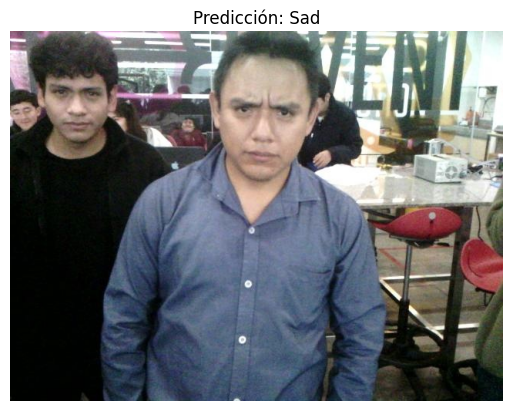

In [36]:
test_image = '../data/test_imgs/enojao2.jpg'  #
emotion, scores = predict_emotion(test_image)
print("Emoción detectada:", emotion)
print("Probabilidades:", [f"{label}: {score:.2f}" for label, score in zip(emotion_labels, scores)])
plt.imshow(cv2.imread(test_image)[..., ::-1])
plt.title(f"Predicción: {emotion}")
plt.axis('off')
plt.show()